In [1]:
# Importação de libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Extraindo dados de consumo de energia na india, cada coluna representa um estado
df = pd.read_csv('./dataset_tk.csv', decimal='.')
df.set_index('data', inplace=True) # Caso queira utilizar a data com índice

df #Visualização dos dados

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
data,,,,,,,,,,,,,,,,,,,,,
02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,100.4,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,101.8,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,103.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6


In [ ]:
df #futuramente criar outra tabela com a data e a soma de todos os estados

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
data,,,,,,,,,,,,,,,,,,,,,
02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,100.4,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,101.8,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,103.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6


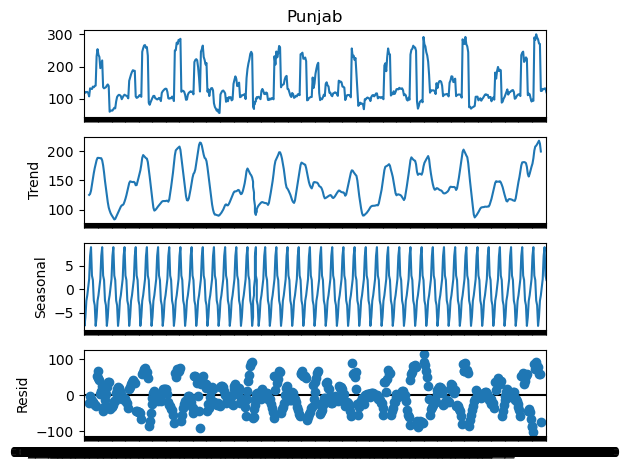

In [4]:

resultado = seasonal_decompose(df['Punjab'], model='additive', period=12)

resultado.plot()
plt.show()

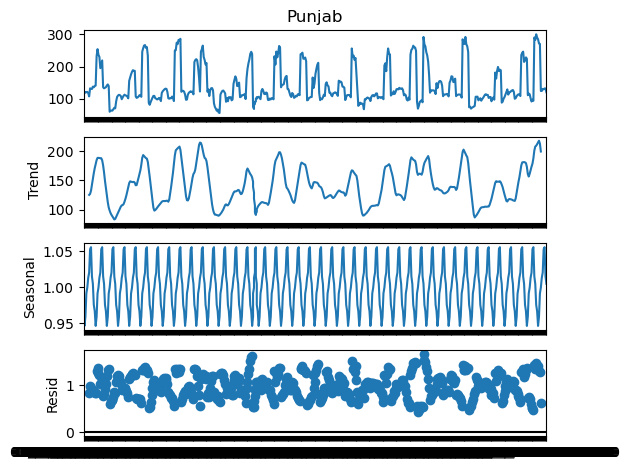

In [5]:
resultado = seasonal_decompose(df['Punjab'], model='multiplicative', period=12)

resultado.plot()
plt.show()